# **Gradient Boosting**

![Return of the Jedi](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Returnofthejedi-logo2.svg/1920px-Returnofthejedi-logo2.svg.png)

Fuente de la imagen: https://es.wikipedia.org



# **Índice**

---

> [Gradient Boosting](#scrollTo=xj3Td2DKv3sQ)
<br>
>>
>> [1 - Introducción a Gradient Boosting](#scrollTo=UIJgdTfzv5OW) 
>>
>> [2 - Construcción del Modelo](#scrollTo=Eu_hXazuv5Rv)
>>> [2.1. Weak Learners](#scrollTo=kUaq-cINaXNm) \\
>>> [2.2. Tasa de Aprendizaje](#scrollTo=Vc31Igwlb_PS) \\
>>> [2.3. Parada Temprana](#scrollTo=vyr9715MlFHH) 
>>
>> [3 - Stochastic Gradient Boosting](#scrollTo=MRdE3GSKlNui) 
>>
>> [4 - Random Forest *vs.* Gradient Boosting](#scrollTo=4xvgrMf_lVP9)
>>
>> [5 - Ventajas y Desventajas](#scrollTo=i9V6DI6wvaua)
>>
>> [Actividad: Análisis de Series Temporales para *Forecasting* de Temperaturas](#scrollTo=9e0Vipz0cbxN)
>>> [Solución](#scrollTo=sm0JL3qeclj3)
>>
>> [IDEAS CLAVE](#scrollTo=I4rnKKIfvWuY)

<br>

< [Random Forest]() | 
[AdaBoost]() >

# **1. Introducción a los Gradient Boosting**

Como vimos en el tema anterior, los algoritmos ensamblados son una poderosa técnica en el arsenal del aprendizaje automático que combina la predicción de varios modelos más simples para mejorar la precisión y el rendimiento del modelo final. *Gradient Boosting* es uno de los algoritmos ensamblados más populares y efectivos en el aprendizaje automático.

Los algoritmos ensamblados se pueden clasificar en dos grandes grupos:

* Los que trabajan de manera independiente y en paralelo (***Bagging***).
* Los que se lanzan en serie (***Boosting***).

Así pues, *Gradient Boosting* es una técnica de ensamblado que utiliza múltiples modelos débiles (*weak*), generalmente árboles de decisión, para crear un modelo fuerte capaz de hacer predicciones precisas. A diferencia del ensamblaje promedio, donde los modelos débiles se combinan de manera ponderada, en *Gradient Boosting* los modelos se construyen secuencialmente, mejorando iterativamente el modelo en cada paso.

El concepto clave en *Gradient Boosting* es el uso de gradientes, que son las derivadas parciales de la función de pérdida utilizada para entrenar el modelo. En cada iteración, se ajusta un modelo débil para capturar los errores o residuos del modelo anterior, es decir, la diferencia entre las predicciones del modelo actual y las verdaderas etiquetas del conjunto de entrenamiento. Luego, se actualiza el modelo actual agregando una fracción de los residuos a las predicciones del modelo anterior, en dirección opuesta al gradiente de la función de pérdida. Este proceso se repite varias veces, ajustando los modelos débiles sucesivamente para corregir los errores del modelo anterior, hasta que se alcanza un cierto número de iteraciones o se cumple algún otro criterio de parada.

A continuación, se muestra el proceso de manera visual, donde los sucesivos árboles de decisión se centran el modelizar los grupos de instancias que llevan a un mayor error, tal y como se visualiza en la siguiente imagen:

![GB_schema](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*tMByW_9FPxDExQdOdNjXdw@2x.jpeg)

<small>FUENTE: https://seeve.medium.com/ensemble-learning-e6eac624c6fd</small>



Una ventaja clave del *Gradient Boosting* es su capacidad para manejar datos desequilibrados, ruidosos o con características complejas. Además, *Gradient Boosting* permite utilizar diferentes funciones de pérdida, lo que lo hace adaptable a una amplia gama de problemas de aprendizaje supervisado, como regresión y clasificación, siendo durante mucho tiempo ganador en múltiples competiciones como Kaggle.


<br>
<p><mark>IMPORTANTE</mark></p>
<hr>

Inicialmente el algoritmo de *Gradiend Boosting* era usado sólo para problemas de Regresión. Más tarde se vió la forma de aplicarlos a otros de Clasificación. Sin embargo, los árboles de decisión que se lanzan son siempre de Regresión. 



# **2. Construcción del Modelo**

La construcción del modelo Gradient Boosting se basa en los siguientes pasos (algunos de ellos comunes a la construcción de cualquier algoritmos de aprendizaje):


1. **Preparación de los datos**: Este es un paso común en cualquier problema de aprendizaje automático y consiste en la carga y preparación adecuada de los datos de entrenamiento, que incluye la limpieza, la normalización o escalado de características, y la división del conjunto de datos en conjuntos de entrenamiento y prueba (se recomienda repasar el tema introductorio así como el de árboles de decisión). Se separa el conjunto de datos en entrenamiento y evaluación.

2. **Entrenamiento del modelo base**: Se entrena el modelo base utilizando el conjunto de datos de entrenamiento. Esto implica ajustar los hiperparámetros del modelo base y ajustarlo a los datos de entrenamiento para obtener un clasificador débil. Utilizando árboles de decisión como modelos base, se construye el primer árbol de decisión ($n=0$) con los datos de entrenamiento, obteniéndose así un primer modelo.

```
tree_model0 = DecisionTreeRegressor()
tree_model0.fit(X_train,y_train)
```

Tras la generación del modelo, se calculan los errores en la predicción mediante la fórmula del *MSE* (Error Medio Cuadrático), aunque se puede seleccionar cualquiera de las medidas de error vistas hasta el momento:

$$E_0 = \frac{1}{n}\sum(y^{pred}_0 - y_0)^2$$

donde:

> $E_0$ es el error en el primer árbol de decisión.

> $y^{pred}_0$ son los valores de predicción del primer árbol de decisión.

> $y_0$ son los valores reales de la variable objetivo en el entrenamiento con el primer árbol de decisión.


3. **Modelización del error del modelo anterior**: Se lanza un nuevo árbol de decisión, pero en lugar de modelizar la variable objetivo $y$ del conjunto de entrenamiento, se modeliza el error de la estimación del punto anterior:

```
tree_model1 = DecisionTreeRegressor()
tree_model1.fit(X_train,E0)
```

4. **Repetición de la secuencia**: Se repite el anterior paso tantas veces como defina el parámetro correspondiente. Es importante notar que cuanto mayor sea este valor, mayor será el ajuste a los datos, mejorando a priori el rendimiento del modelo, pero incrementando el riesgo de sobreajuste. 

5. **Obtención de la predicción**: Una vez se finaliza el proceso, se obtiene la predicción final del ensamblado como la suma de todas las predicciones:

$$treemodel_0.predict(X_{train})+treemodel_1.predict(X_{train})+...+treemodel_n.predict(X_{train})$$




<br/>
<mark>RECUERDA</mark>
<hr/>

Todos los árboles de decisión que se construyan van a ser de muy pocos niveles de profundidad.

Veámoslo con un ejemplo en Python. Preparamos el entorno cargando las librerías necesarias:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_moons
from sklearn.ensemble import GradientBoostingClassifier

Creamos artificialmente un conjunto de observaciones en dos dimensiones y las representamos gráficamente.

Se recomienda jugar con los parámetros *n_samples* y *noise* y observar su efecto en el modelo resultante.

In [3]:
n_samples = 2000
noise = 0.3

X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
print (X.shape)
print (y.shape)

(2000, 2)
(2000,)


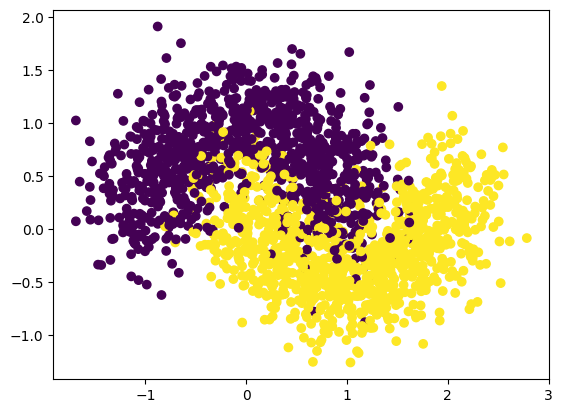

In [4]:
plt.scatter(x=X[:,0], y=X[:,1], c=y)

Particionamos el conjunto de datos en entrenamiento y evaluación, y sacamos algunas estadísticas del número de elementos por conjunto y clase.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1400, 2) (1400,)
(600, 2) (600,)


In [6]:
print (sum(y_train==0))
print (sum(y_train==1))
print (sum(y_test==0))
print (sum(y_test==1))

700
700
300
300


Creamos un clasificador basado en *Gradient Boosting* donde limitamos la profundidad máxima de los árboles (*max_depth*) y el número de árboles/estimadores (*n_estimators*).

Se recomienda jugar con los parámetros *n_estimators* y *max_depth* y observar su efecto en el modelo resultante.

In [7]:
n_estimators = 50
max_depth = 2

gb_model = GradientBoostingClassifier(random_state=0, n_estimators=n_estimators, max_depth=max_depth)
gb_model.fit(X_train, y_train)
pred_train = gb_model.predict(X_train)
pred_test = gb_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*gb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*gb_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 92.64
Precisión sobre los datos de test: 90.67


In [8]:
pred_train

array([0, 1, 1, ..., 0, 1, 1])

Mostramos el grafo asociado a uno de los árboles de decisión (se recomienda variar el parámetro *tree_number* para visualizar otros árboles):

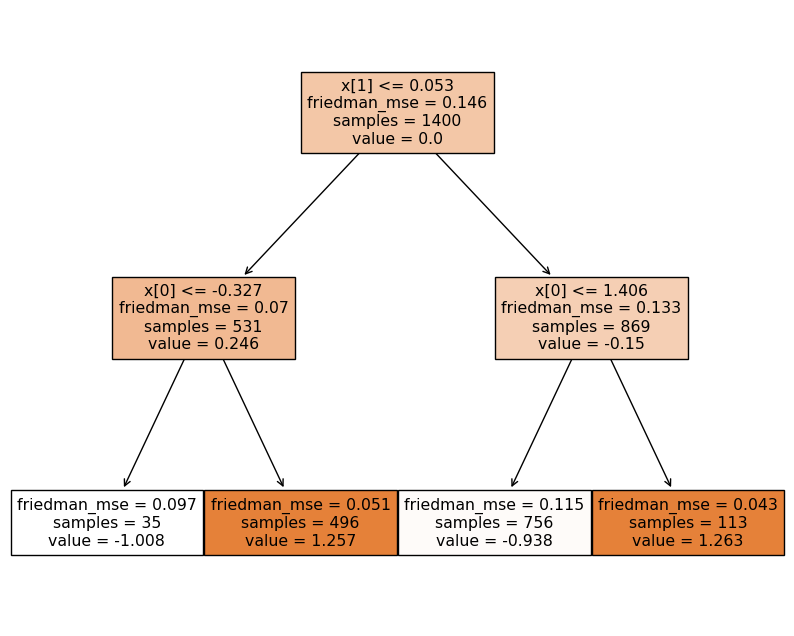

In [9]:
tree_number = 5

from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(gb_model.estimators_[tree_number][0], filled=True, max_depth=2)
plt.show()

<br/>
<mark>IMPORTANTE</mark>
<hr/>

Como se puede apreciar y ya se comentó, los árboles de decisión son regresores. Devuelven un valor de error (*friedman_mse*) en lugar de un valor de impureza (e.g., *Gini*) como sucedería en un clasificador, de igual modo que el valor devuelto (*value*) es un valor continuo en lugar de una clase.

Visualizamos las fronteras de decisión, tanto sobre el conjunto de entrenamiento como de evaluación:

In [10]:
def plot_boundaries_test(XX, YY, model, proba, XXtest, YYtest, title):

    plot_step = 0.1

    x_min, x_max = XX[:, 0].min() - 0.5, XX[:, 0].max() + 0.5
    y_min, y_max = XX[:, 1].min() - 0.5, XX[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    ## https://interactivechaos.com/es/manual/tutorial-de-numpy/la-funcion-meshgrid
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    if proba:
      pred = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
      pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)
    cs = plt.contourf(xx, yy, pred, cmap=plt.cm.RdYlBu, alpha=0.5)

    plt.xlabel("X1")
    plt.ylabel("X2")

    scatter = plt.scatter(x=XXtest[:,0], y=XXtest[:,1], c=YYtest, 
                cmap=plt.cm.RdYlBu, edgecolor='black', alpha=0.5
                )

    plt.suptitle(title)
    # produce a legend with the unique colors from the scatter
    legend1 = plt.legend(*scatter.legend_elements(),
                        loc="lower left", title="Classes")
    plt.axis("tight")
    plt.show()

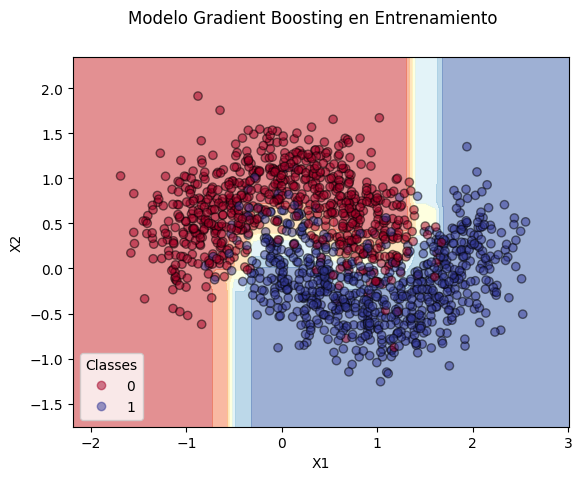

In [11]:
plot_boundaries_test(X_train, y_train, gb_model, True, X_train, y_train, "Modelo Gradient Boosting en Entrenamiento")

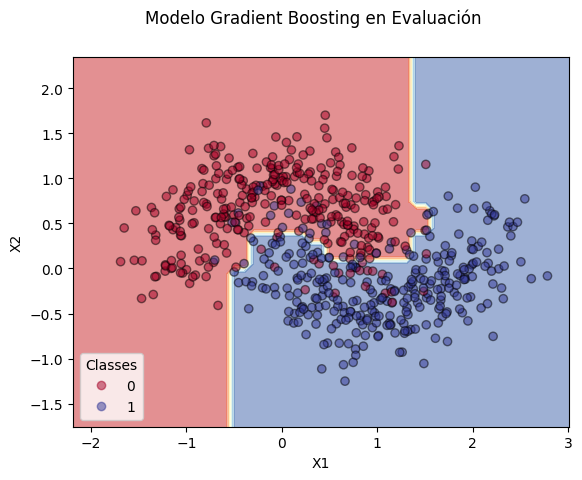

In [12]:
plot_boundaries_test(X_train, y_train, gb_model, False, X_test, y_test,"Modelo Gradient Boosting en Evaluación")

## **2.1. Weak Learners**

Los *weak learners* son uno de los componentes fundamentales del algoritmo *Gradient Boosting*, donde un modelo predictivo se construye de manera iterativa mediante la combinación de varios de estos *weak learners* para formar un modelo más fuerte y preciso.

Un *weak learner* es un modelo de aprendizaje automático relativamente simple y con un rendimiento ligeramente mejor que el azar en un problema de clasificación o regresión. Por lo general, los *weak learners* son modelos con baja complejidad, como árboles de decisión con poca profundidad (también conocidos como árboles débiles), regresiones lineales o modelos lineales generalizados.

El concepto clave en *Gradient Boosting* es que la combinación de múltiples *weak learners* puede resultar en un modelo predictivo altamente preciso. Como hemos visto, en cada iteración del algoritmo, se ajusta un *weak learner* al residuo del modelo en el paso anterior, es decir, al error cometido por el modelo en las predicciones previas. Luego, se suma la predicción del *weak learner* al modelo existente, corrigiendo así los errores cometidos en las iteraciones anteriores. Este proceso se repite varias veces para construir un modelo más preciso en cada iteración.

Una de las ventajas de utilizar *weak learners* en *Gradient Boosting* es que son modelos relativamente simples y rápidos de entrenar, lo que permite una construcción eficiente del modelo predictivo en comparación con modelos más complejos. Además, la combinación de múltiples *weak learners* en un modelo más fuerte puede ayudar a mitigar el riesgo de sobreajuste y mejorar la capacidad de generalización del modelo.

Sin embargo, una posible desventaja de utilizar *weak learners* es que pueden tener un sesgo inherente y limitada capacidad de modelar relaciones complejas en los datos. Por lo tanto, es importante seleccionar cuidadosamente los *weak learners* y ajustar adecuadamente otros hiperparámetros del algoritmo, como la tasa de aprendizaje y el número de iteraciones, para obtener un buen rendimiento en un problema específico.



## **2.2. Tasa de Aprendizaje**

La tasa de aprendizaje o *learning rate* es un hiperparámetro importante en el algoritmo *Gradient Boosting* que controla la velocidad de actualización del modelo en cada iteración. Es un valor escalar que determina cuánto se ajusta el modelo en función del error residual en cada paso del algoritmo.

Para optimizar los errores residuales en cada iteración, se utiliza *Gradient Descent*, algoritmo de optimización utilizado para encontrar los valores óptimos de los parámetros del modelo minimizando una función de pérdida o error en función de los datos de entrenamiento (gradiente o derivada del error). Se trata de ir dando pasos mediante el cálculo de la derivada (gradiente) para poco a poco acercarnos al mínimo de esa función de coste, como se puede apreciar en la siguiente figura:

![Gradient_Descent3D](https://gblobscdn.gitbook.com/assets%2F-LvBP1svpACTB1R1x_U4%2F-Lw5TMq46bZGMFbfk1mp%2F-Lw6lSr3sxuY0gzJBEB9%2Fimage.png?alt=media&token=de87218f-2936-4e0c-9aad-975ccf88ad98)

<small>FUENTE: https://docs.paperspace.com/machine-learning/wiki</small>


En *Gradient Boosting*, el *learning rate* se multiplica por la predicción del *weak learner* en cada iteración antes de agregarla al modelo existente. Es importante seleccionar adecuadamente la tasa de aprendizaje en *Gradient Boosting*, ya que afecta al rendimiento y a la capacidad de generalización del modelo. 

* Una tasa de aprendizaje **alta** provocará que cada nuevo árbol de decisión realice correcciones más fuertes sobre los errores de los modelos anteriores, dando "pasos grandes" en el *Gradient Descent*. El modelo se estaría haciendo más complejo en menos tiempo, lo que a su vez puede hacer que el modelo sea más sensible a los datos de entrenamiento y resultar en un sobreajuste. 

* Una tasa de aprendizaje **baja** provocará que las correcciones sean menores y se necesiten más árboles de decisión para conseguir el ajuste deseado, haciendo que el modelo converja lentamente y requiera más iteraciones para alcanzar un nivel óptimo de precisión.

Una estrategia común para seleccionar la tasa de aprendizaje es probar varios valores en un rango amplio, como 0.1, 0.01, 0.001, y evaluar su impacto en el rendimiento del modelo mediante validación cruzada u otras técnicas de evaluación del rendimiento. También se puede utilizar en conjunto con otros hiperparámetros del algoritmo, como el número de iteraciones, para encontrar la combinación óptima que resulte en el mejor rendimiento del modelo en el conjunto de datos específico.


**Efecto en la corrección de errores**

Como hemos visto, el parámtro *learning rate* nos permitirá ajusta la velocidad de la corrección de errores. Vamos a ver cómo se comporta el modelo para diferentes árboles de decisión, comprobando como cada uno de ellos se va ajustando a una zona diferente del plano.

Se recomienda jugar con el parámetro **learning rate** y observar su efecto. Por ejemplo, incrementando su valor de 0.1 a 1.0, tendremos un algoritmo más agresivo en la corrección de errores (se observa mediante un mayor cambio en los gráficos).


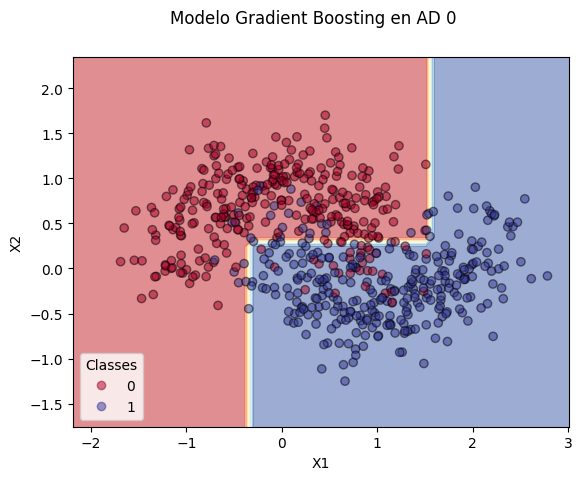

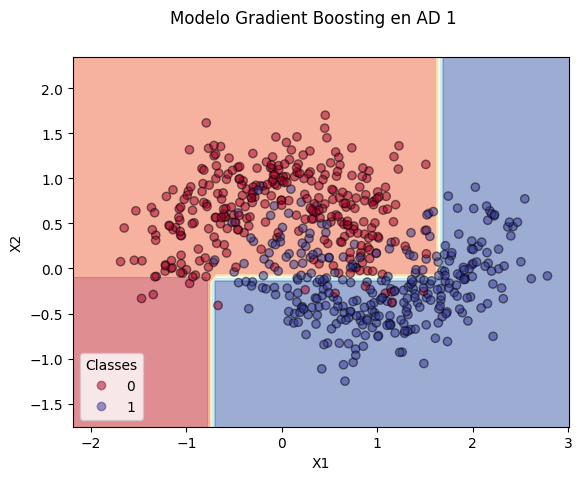

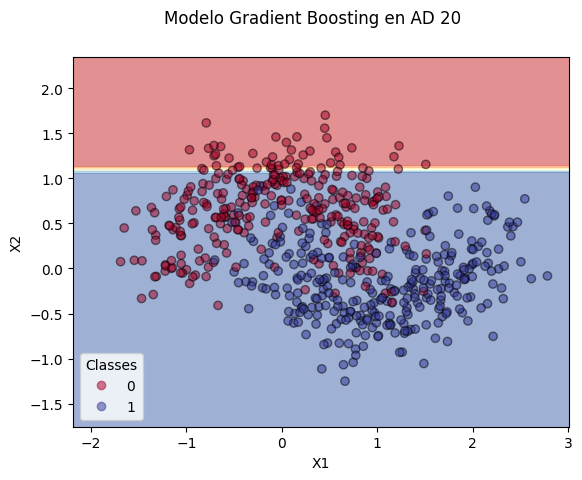

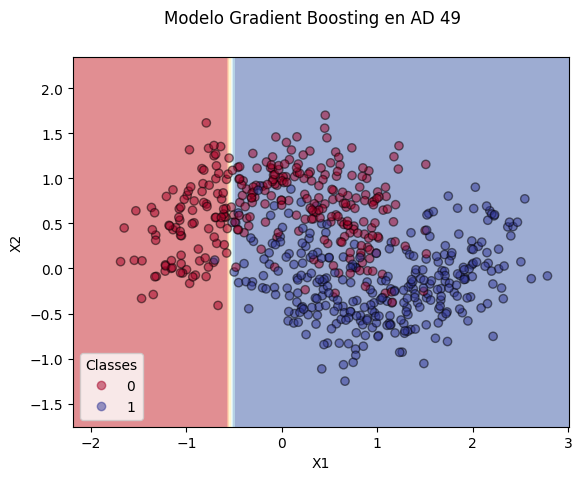

In [13]:
n_estimators = 50
max_depth = 2
learning_rate = 1.0

for i in [0, 1, 20, 49]:
  gb_model = GradientBoostingClassifier(random_state=0, n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
  gb_model.fit(X_train, y_train)
  pred_train = gb_model.estimators_[i][0].predict(X_train)
  pred_test = gb_model.estimators_[i][0].predict(X_train)
  plot_boundaries_test(X_train, y_train, gb_model.estimators_[i][0], False, X_test, y_test,f"Modelo Gradient Boosting en AD {i}")

**Efecto de la tasa de aprendizaje y su vinculación con el número de estimadores**

El número de árboles (estimadores) y la tasa de aprendizaje son dos hiperparámetros importantes en *Gradient Boosting* que están relacionados y afectan el rendimiento del modelo:

* **Mayor número de árboles de decisión**: Aumentar el número de árboles en un modelo de *Gradient Boosting* generalmente aumenta la capacidad del modelo para ajustarse a los datos de entrenamiento. Cuanto mayor sea el número de árboles, más complejo será el modelo y más capacidad tendrá para capturar patrones y relaciones no lineales en los datos de entrenamiento. Sin embargo, un aumento excesivo en el número de árboles puede llevar a un sobreajuste, lo que significa que el modelo puede aprender el ruido en los datos de entrenamiento y no generalizar bien a datos nuevos.

* **Menor número de árboles de decisión**: Por otro lado, un menor número de árboles de decisión en *Gradient Boosting* puede resultar en un modelo más simple con menor capacidad de ajuste a los datos de entrenamiento. Esto puede resultar en un menor rendimiento en términos de precisión y capacidad de generalización del modelo. Sin embargo, un menor número de árboles puede ayudar a prevenir el sobreajuste y puede ser útil en situaciones donde los datos de entrenamiento son limitados.

* **Vinculación con la tasa de aprendizaje**: La tasa de aprendizaje es un hiperparámetro que controla la tasa de actualización de los pesos de los árboles en *Gradient Boosting*. Una tasa de aprendizaje más alta permite actualizaciones más grandes en cada iteración, lo que puede hacer que el modelo converja más rápidamente, pero también puede hacer que el modelo sea más propenso a sobreajustar los datos de entrenamiento. Por otro lado, una tasa de aprendizaje más baja requiere más iteraciones para alcanzar la convergencia, pero puede resultar en un modelo más robusto y menos propenso a sobreajustar.

Por tanto, el número de árboles de decisión en *Gradient Boosting* está vinculado con la tasa de aprendizaje en el sentido de que un mayor número de árboles puede requerir una tasa de aprendizaje más baja para controlar la convergencia del modelo y evitar el sobreajuste. Por otro lado, un menor número de árboles de decisión puede requerir una tasa de aprendizaje más alta para acelerar la convergencia del modelo y evitar el subajuste. La elección adecuada del número de árboles y de la tasa de aprendizaje depende del conjunto de datos específico y los objetivos del modelo, y generalmente requiere experimentación y ajuste iterativo para encontrar la combinación óptima de hiperparámetros.



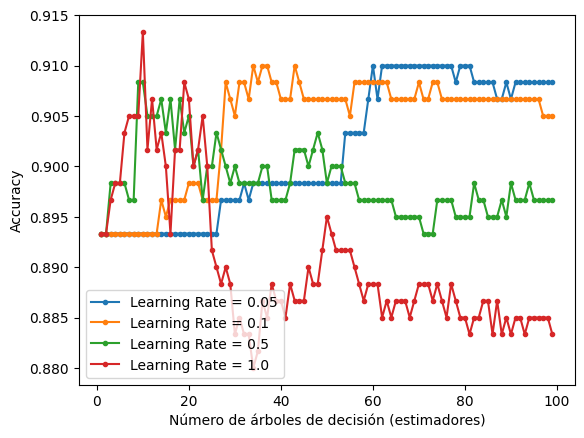

In [14]:
min = 1
max = 100
max_depth = 2

for learning_rate in [0.05, 0.1, 0.5, 1.0]:
  accuracy = []
  for n_estimators in range (min, max): 
    gb_model = GradientBoostingClassifier(random_state=0, n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
    gb_model.fit(X_train, y_train)
    accuracy.append(gb_model.score(X_test, y_test))
  plt.plot(range(min,max), accuracy, marker='.', linestyle='-', label="Learning Rate = " + str(learning_rate))
plt.xlabel('Número de árboles de decisión (estimadores)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
  

## **2.3. Parada Temprana**

La parada temprana, también conocida como *early stopping*, es una técnica utilizada en *Gradient Boosting* para detener el proceso de entrenamiento del modelo antes de que alcance el número máximo de iteraciones (es decir, el número máximo de árboles) especificado previamente. El objetivo de la parada temprana es evitar el sobreajuste y mejorar la generalización del modelo, evitando que se siga ajustando a ruido o patrones espurios en los datos de entrenamiento.

La parada temprana se basa en el seguimiento del rendimiento del modelo en un conjunto de datos de validación, que es diferente al conjunto de datos de entrenamiento. Durante el entrenamiento, se va evaluando el rendimiento del modelo en el conjunto de datos de validación en cada iteración. Si el rendimiento en el conjunto de validación deja de mejorar o comienza a empeorar, se detiene el entrenamiento y se selecciona el modelo en el punto óptimo antes del empeoramiento como el modelo final.

La parada temprana se implementa mediante la configuración de un umbral o un número de iteraciones consecutivas en las que el rendimiento en el conjunto de validación no mejora antes de detener el entrenamiento. Esto ayuda a evitar que el modelo se ajuste demasiado a los datos de entrenamiento y mejora su capacidad de generalización a nuevos datos.

La parada temprana es una técnica útil en *Gradient Boosting* y otros algoritmos de aprendizaje automático para evitar el sobreajuste y mejorar la capacidad de generalización del modelo. Sin embargo, es importante ajustar adecuadamente los hiperparámetros asociados con la parada temprana, como el umbral o el número de iteraciones consecutivas sin mejora, para obtener los mejores resultados en un problema específico.



Veámoslo con un ejemplo en Python. Para ello, usaremos un método que nos ofrece *Scikit Learn* denominado *staged_predict()* y que nos da información sobre las predicciones de cada uno de los árboles de decisión.

Utilizaremos el dataset sobre la progresión de la *Diabetes* (problema de regresión).

Preparamos el entorno cargando las librerías necesarias.

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

Cargamos el dataset *Diabetes* de *Scikit Learn*.

In [16]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

Preparamos el dataframe en el formato necesario para el algoritmos de aprendizaje.

In [17]:
df_features = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data.target, columns=["progression"])
df_all = pd.concat([df_features, df_target],axis=1)

Realizamos la división (*split*) entre entrenamiento y evaluación.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features.values, df_target.values, 
                                                    random_state=42, test_size=0.3)

Generamos el modelo de regresión *Gradient Boosting*.

Se recomienda jugar con los parámetros *n_estimators*, *max_depth* y *learning_rate*.

In [19]:
n_estimators = 300
max_depth = 1
learning_rate = 0.2

gb_model = GradientBoostingRegressor(random_state=0, n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
gb_model.fit(X_train, y_train)

pred_train = gb_model.predict(X_train)
pred_test = gb_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*gb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*gb_model.score(X_test, y_test)))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión sobre los datos de entrenamiento: 70.22
Precisión sobre los datos de test: 45.64


Visualizamos la importancia de las variables.

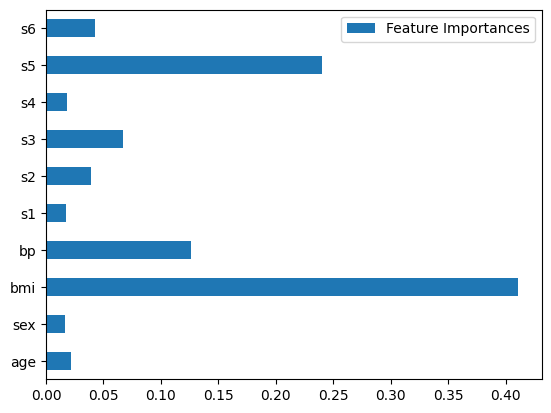

In [20]:
df_imp = pd.DataFrame(gb_model.feature_importances_.reshape(1,-1), columns=df_features.columns, index=["Feature Importances"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

Visualizamos la variable a predecir (*progression*) en función de parejas de variables, seleccionando las que mayor importancia tienen en la predicción (se recomienda modificar las parejas y visualizar los resultados).

<Axes: xlabel='bmi', ylabel='s5'>

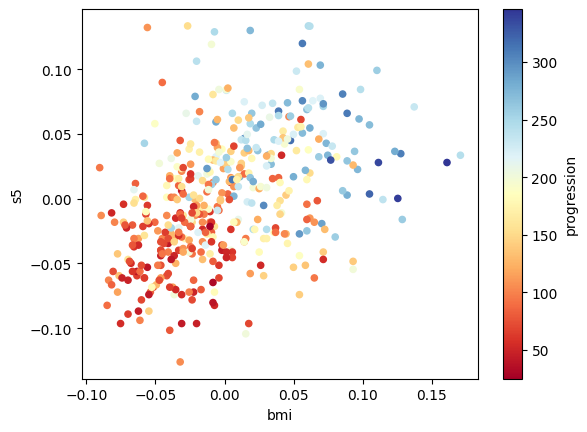

In [21]:
x = "bmi"
y = "s5"

df_all.plot.scatter(x=x, y=y, c="progression", cmap=plt.cm.RdYlBu)

Calculamos el MSE de cada una de las predicciones individuales de cada árbol de decisión.

In [22]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in gb_model.staged_predict(X_test)]
errors[0:5]

[4914.268121541687,
 4328.8960887354315,
 4045.9912723253788,
 3705.617127897386,
 3635.7476283009855]

Podemos obtener el número óptimo de árboles de decisión por aquel árbol donde el MSE es el menor:

In [23]:
best_n_AD = np.argmin(errors)
best_n_AD

50

Exploramos el mejor modelo según el cálculo anterior:

In [24]:
best_model = GradientBoostingRegressor(random_state=0, n_estimators=best_n_AD, max_depth=max_depth, learning_rate=learning_rate)
best_model.fit(X_train, y_train)
pred_train = best_model.predict(X_train)
pred_test = best_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*best_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*best_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 59.22
Precisión sobre los datos de test: 50.46


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Visualizamos el rendimiento (errores) en función del número de estimadores y comprobamos que el menor número de errores se produce con el número de estimadores obtenido anteriormente:

<Axes: xlabel='n_trees', ylabel='errors'>

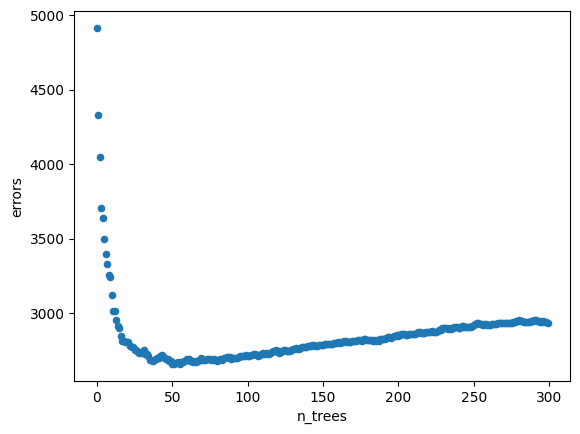

In [25]:
d = pd.DataFrame({"n_trees":list(range(n_estimators)), "errors":errors})
d.plot.scatter(x="n_trees", y= "errors")

# **3. Stochastic Gradient Boosting**

Una variante popular del *Gradient Boosting* es el *Stochastic Gradient Boosting*, también conocido como *Gradient Boosting* con remuestreo estocástico. A diferencia del *Gradient Boosting* clásico, donde se utiliza el conjunto de entrenamiento completo para ajustar cada árbol, en *Stochastic Gradient Boosting* se utiliza una muestra aleatoria (submuestra) del conjunto de entrenamiento para ajustar cada árbol. Esto introduce aleatoriedad en el proceso de construcción del modelo y puede mejorar su capacidad para manejar datos ruidosos o con alta varianza.

El remuestreo estocástico en Stochastic Gradient Boosting puede realizarse de dos maneras:

* Muestreo de filas (instancias): En este enfoque, se selecciona aleatoriamente una fracción de filas del conjunto de entrenamiento para construir cada árbol. Esto significa que algunas filas se seleccionan varias veces, mientras que otras no se seleccionan en absoluto. La fracción de filas seleccionadas se puede controlar mediante un hiperparámetro llamado tasa de muestreo (*subsampling rate*) o fracción de muestra (*subsample fraction*), generalmente representado como un valor entre 0 y 1. Por ejemplo, si se utiliza una tasa de muestreo del 0.8, se seleccionará aleatoriamente el 80% de las filas para construir cada árbol.

* Muestreo de características (columnas): En este enfoque, se selecciona aleatoriamente un subconjunto de características (columnas) del conjunto de entrenamiento para construir cada árbol. Esto significa que sólo se utilizan algunas características en la construcción de cada árbol, lo que introduce más aleatoriedad y diversidad en los árboles. La fracción de características seleccionadas se puede controlar mediante otro hiperparámetro llamado tasa de características (*feature subsampling rate*) o fracción de características (*colsample fraction*), generalmente representado como un valor entre 0 y 1.

El uso de remuestreo estocástico en *Stochastic Gradient Boosting* puede tener varios beneficios: 

* En primer lugar, reduce el riesgo de sobreajuste (*overfitting*), ya que los árboles están expuestos a una fracción aleatoria de datos en cada iteración, lo que puede hacer que el modelo sea más generalizable. 

* En segundo lugar, puede acelerar el proceso de entrenamiento, ya que se utilizan subconjuntos más pequeños de datos para ajustar cada árbol, lo que puede resultar en tiempos de entrenamiento más cortos. 

* Además, el muestreo de características puede ayudar a manejar conjuntos de datos con muchas características, evitando la construcción de árboles redundantes basados en las mismas características en cada iteración.

<br>
<p><mark>NOTA </mark></p>
<hr>


*Scikit Learn* nos ofrece un parámetro que se denomina ***subsample*** con el que podemos decidir la proporción de instancias que se van a usar. Si decidimos que $subsample = 0.5$, entonces Los árboles de decisión se modelizan sobre subconjuntos aleatorios de tamaño la mitad del conjunto de datos original. De esta forma, el entrenamiento se llevará a cabo en menos tiempo y con menos recursos de máquina.

Es importante experimentar con diferentes tasas de muestreo y tasas de características para encontrar la configuración óptima para cada problema específico.

# **4. Random Forest *vs.* Gradient Boosting**



*Random Forest* y *Gradient Boosting* son dos técnicas de aprendizaje automático ensambladas que combinan múltiples modelos de base para mejorar la precisión y rendimiento de predicción. Ambos algoritmos son conocidos por su capacidad para manejar conjuntos de datos complejos y obtener resultados precisos en una amplia variedad de problemas de aprendizaje supervisado.

A continuación tenemos una breve comparación entre ambos métodos:

* **Construcción del modelo**: En *Random Forest*, se construye un conjunto de árboles de decisión independientes y se realiza una votación o promedio de sus predicciones para obtener la predicción final del modelo. Por otro lado, en *Gradient Boosting*, los árboles se construyen de forma secuencial y se ajustan a los errores residuales del modelo anterior, lo que da lugar a un modelo final que es una combinación ponderada de los árboles.

* **Enfoque de ensamblaje**: *Random Forest* utiliza un enfoque de ensamblaje de tipo *bagging*, donde los árboles se construyen de forma paralela e independiente utilizando muestras aleatorias con reemplazo del conjunto de entrenamiento completo. En cambio, *Gradient Boosting* utiliza un enfoque de ensamblaje de tipo *boosting*, donde los árboles se construyen de forma secuencial, ajustándose a los errores residuales del modelo anterior para corregir los errores del modelo anterior.

* **Manejo de datos desequilibrados**: *Random Forest* tiende a ser más robusto al manejar conjuntos de datos desequilibrados, ya que utiliza muestras aleatorias con reemplazo en la construcción de árboles, lo que puede ayudar a evitar el sesgo hacia clases mayoritarias. En *Gradient Boosting*, la construcción secuencial de árboles puede tener un sesgo hacia las clases mayoritarias, lo que puede requerir ajustes en los pesos o tasas de aprendizaje para manejar datos desequilibrados.

* **Sensibilidad a hiperparámetros**: *Random Forest* tiende a tener menos hiperparámetros para ajustar en comparación con *Gradient Boosting*, lo que puede hacer que su configuración sea más sencilla. *Gradient Boosting*, por otro lado, tiene más hiperparámetros para ajustar, como la tasa de aprendizaje, el número de árboles, la profundidad de los árboles, etc., lo que puede requerir más afinamiento y experimentación para obtener la mejor configuración para un problema específico.

* **Rendimiento y precisión**: En general, *Gradient Boosting* tiende a tener un mejor rendimiento y mayor precisión en comparación con *Random Forest* en muchos casos, especialmente cuando se trata de problemas complejos y datos de alta dimensionalidad. Esto se debe a la construcción secuencial de árboles en *Gradient Boosting*, que permite corregir los errores del modelo anterior y mejorar la precisión en cada iteración. Sin embargo, *Random Forest* puede ser más rápido en términos de tiempo de entrenamiento y predicción, ya que los árboles se construyen de forma paralela e independiente.

Y algunas particularidades de ambos métodos:

**Random Forest**

* Su entrenamiento puede ser costoso en tiempo y recursos (memoria RAM por ejemplo), pero es fácilmente paralelizable (*n_jobs*).
* Mejoran en precisión a los árboles de decisión a la par que son mucho más robustos frente al sobreajuste.
* Los árboles de decisión suelen tener mayor profundidad que en el caso de *Gradient Boosting*.

**Gradient Boosting**
* Su entrenamiento también puede ser costoso en tiempo y recursos, pero en este caso no se puede paralelizar (es un método de entrenamiento secuencial).
* Mejoran, en muchas ocasiones, la precisión de Random Forest. Pero es más fácil caer en overfitting.
* Su rendimiento es mucho más dependiente de los parámetros, siendo más complejos de afinal (*fine tuning*).
* Los árboles de decisión son siempre de muy poca profundidad (*weak learners*).

**Ambos**

* No precisan de ningún tipo de escalado en el preprocesado, puede trabajar con los valores tal cual están en el dataset.
* Proporciona la importancia de las variables predictoras, contribuyendo a la explicabilidad del algoritmo y la toma de decisiones.
* No son capaces de hacer *forecast* de series temporales.
* No trabajan bien con *sparse datasets* (por ejemplo, con muchos ceros).

# **5. Ventajas y Desventajas**
**Ventajas**:

* **Alta precisión**: *Gradient Boosting* es conocido por su capacidad para ofrecer resultados precisos en problemas de aprendizaje supervisado. La construcción secuencial de árboles y la corrección de errores residuales en cada iteración pueden llevar a un modelo final altamente preciso.

* **Manejo de datos complejos**: *Gradient Boosting* es capaz de manejar datos complejos con alta dimensionalidad, datos ruidosos o datos desequilibrados. Puede capturar relaciones no lineales y patrones complejos en los datos, lo que lo hace adecuado para una amplia gama de problemas en el mundo real.

* **Flexibilidad en funciones de pérdida**: *Gradient Boosting* permite la especificación de diferentes funciones de pérdida, lo que permite adaptar el algoritmo para abordar problemas específicos, como la regresión, clasificación binaria o multiclase.

* **Potencial de regularización**: *Gradient Boosting* permite la incorporación de técnicas de regularización, como la reducción de la tasa de aprendizaje, la limitación de la profundidad de los árboles, la restricción del número de nodos terminales, entre otros, lo que puede ayudar a prevenir el sobreajuste del modelo.

**Desventajas**:

* **Sensibilidad a hiperparámetros**: *Gradient Boosting* tiene varios hiperparámetros que deben ser ajustados, como la tasa de aprendizaje, el número de árboles, la profundidad de los árboles, etc. El ajuste incorrecto de estos hiperparámetros puede afectar el rendimiento del modelo.

* **Mayor tiempo de entrenamiento**: La construcción secuencial de árboles en *Gradient Boosting* puede ser más lenta en comparación con algoritmos paralelos, como *Random Forest*, lo que puede resultar en un mayor tiempo de entrenamiento, especialmente en conjuntos de datos grandes.

* **Posibilidad de sobreajuste**: Si no se manejan adecuadamente los hiperparámetros de *Gradient Boosting* o no se aplican técnicas de regularización, existe la posibilidad de sobreajuste del modelo, lo que puede afectar su capacidad de generalización a datos no vistos.

* **Requiere más conocimiento y experiencia**: *Gradient Boosting* puede ser más complejo de entender y configurar en comparación con otros algoritmos de aprendizaje automático. Requiere un buen conocimiento del algoritmo y experiencia en su ajuste para obtener los mejores resultados.

*Gradient Boosting* es un algoritmo de aprendizaje automático potente y preciso, pero requiere de un cuidadoso ajuste de hiperparámetros, así como depende de una correcta regularización para evitar el sobreajuste. Es adecuado para problemas complejos, pero también puede ser más lento en términos de tiempo de entrenamiento y requiere más experiencia en su configuración.

# **Actividad Guiada. Análisis de Series Temporales para *Forcasting* de temperaturas**

El objetivo de la siguiente actividad es el de demostrar cómo se pueden usar modelos de aprendizaje automático para abordar series temporales, en este caso en concreto con *Gradient Boosting*. 

Como veremos, va a ser necesaria cierta ingeniería de varibales (*feature engineering*) para poder abordar este tipo de problemas.

Para la realización de la actividad guiada, vamos a utilizar el conjunto de datos de predicción del tiempo (*Weather Forecasting*) para el clima en la India (https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data). 

El conjunto de datos proporciona datos desde el 1 de enero de 2013 hasta el 24 de abril del 2017 en la ciudad de Delhi, India.

Las 4 variables proporcionadas son:

* Temperatura media (*meantemp*) 
* Humedad (*humidity*)
* Velocidad del viento (*wind_speed*)
* Presión media (*meanpressure*).

Vamos a analizar la serie temporal y a generar un modelo que nos permita hacer *forecasting*.



## Solución 

[*A continuación, haz clic para conocer la solución.*]

###**Preparación del Entorno**

Cargamos las librerías necesarias para manipular y preparar los datos y construir el modelo.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### **Lectura de Datos**

Podemos descargar una versión del conjunto de datos del proyecto FBProphet (https://github.com/pik1989/FBProphet) disponible en Github. 

Los datos vienen en dos archivos csv, uno con los de entrenamiento y el otro con los de evaluación, así que procedemos a su descarga e inspección:


In [27]:
df_train = pd.read_csv("https://github.com/pik1989/FBProphet/raw/main/DailyDelhiClimateTrain.csv", parse_dates=["date"])
print(df_train.shape)
df_train.head(5)

(1462, 5)


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [28]:
df_test = pd.read_csv("https://github.com/pik1989/FBProphet/raw/main/DailyDelhiClimateTest.csv", parse_dates=["date"])
print(df_test.shape)
df_test.head(5)

(114, 5)


,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


### **Análisis Gráfico de los Datos**

A continuación visualizamos gráficamente el conjunto de datos, mostrando una serie temporal (en función del tiempo) por cada una de las variables que contiene (*meantemp*, *humidity*, *wind_speed*, y *meanpressure*).


Lo hacemos tanto para el conjunto de datos de entrenamiento, que contiene valores entre 2013 y 2017 (y que será con el que aprenderemos el modelo):

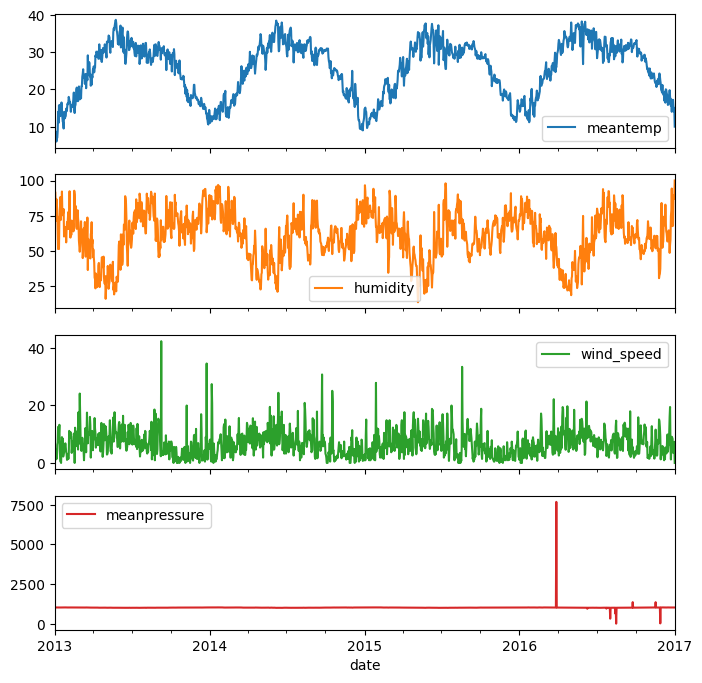

In [29]:
df_train.set_index("date").plot(subplots=True, figsize=(8,8));

Como en el conjunto de evaluación, que contiene valores a partir de 2017 (y que será el conjunto en el que trataremos de hacer *forecasting*):

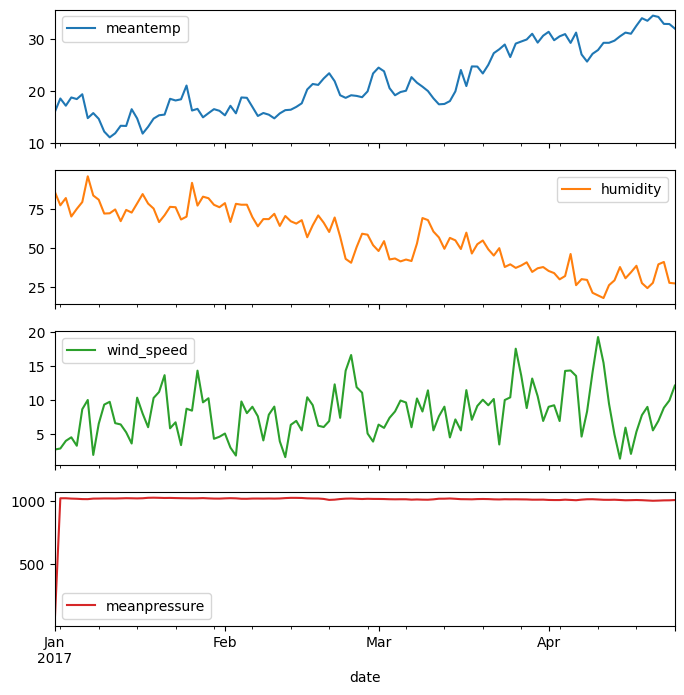

In [30]:
df_test.set_index("date").plot(subplots=True, figsize=(8,8));

Como se puede observar, tanto en el subconjunto de entrenamiento como en el de evaluación, los datos relativos a la presión atmosférica media parecen presentar valores extremos (*outliers*). Tras inspeccionar los datos mediante un *boxplot* (podríamos realizar un análisis estadístico más elaborado para obtener estos valores), podemos estimar que acotando esta variable entre 980 y 1100 conseguimos eliminar dichos *outliers* y visualizar un gráfico más representativo.

<Axes: >

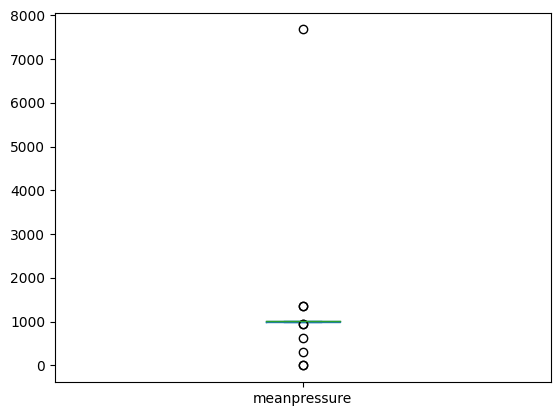

In [31]:
df_train["meanpressure"].plot.box()

<Axes: xlabel='date'>

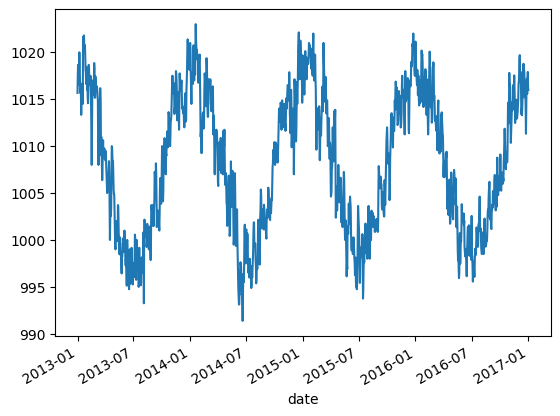

In [32]:
df_train[df_train["meanpressure"].between(980,1100)].set_index("date")["meanpressure"].plot()

Graficando de nuevo todo junto:

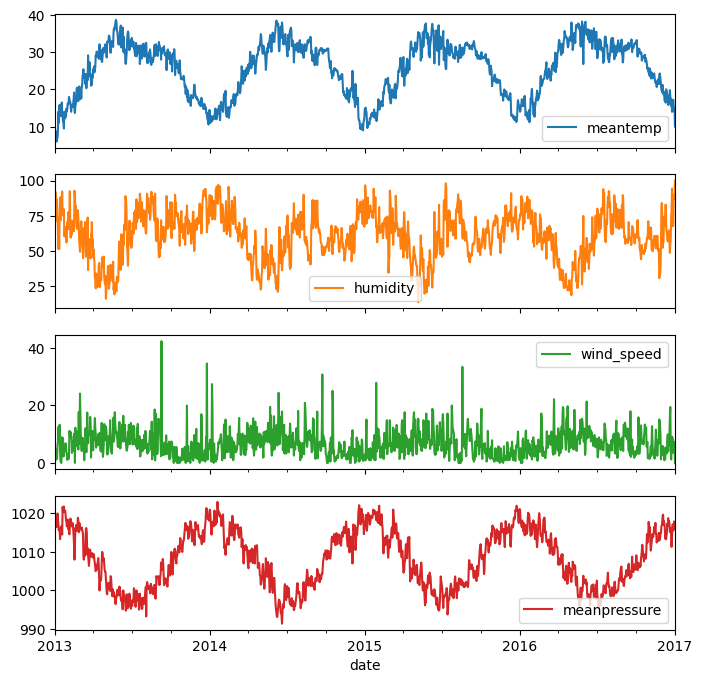

In [33]:
df_train.loc[~df_train["meanpressure"].between(980,1100), "meanpressure"] = np.nan
df_train["meanpressure"].fillna(method="bfill", inplace=True)
df_train.set_index("date").plot(subplots=True, figsize=(8,8));

Repetimos el mismo proceso para el subconjunto de evaluación:

<Axes: xlabel='date'>

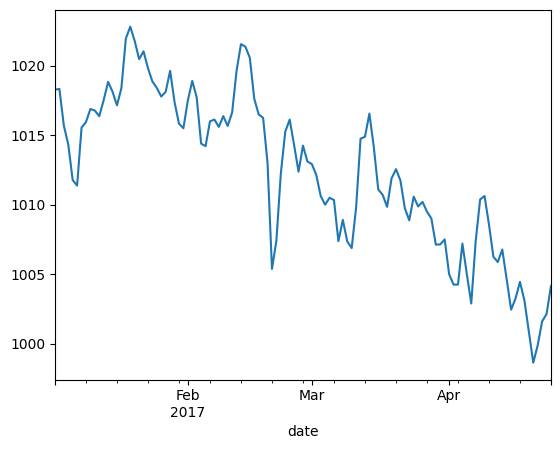

In [34]:
df_test[df_test["meanpressure"].between(980,1100)].set_index("date")["meanpressure"].plot()

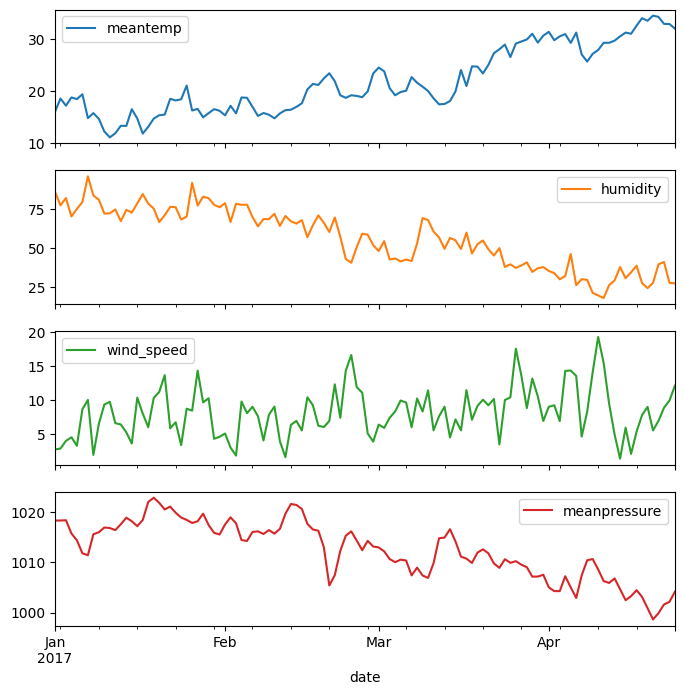

In [35]:
df_test.loc[~df_test["meanpressure"].between(980,1100), "meanpressure"] = np.nan
df_test["meanpressure"].fillna(method="bfill", inplace=True)
df_test.set_index("date").plot(subplots=True, figsize=(8,8));

En los gráficos anteriores se puede observar a simple vista:

* Una relación inversa entre presión atmosférica y temperatura.

* Una relación inversa entre humedad y temperatura.

* Una relación directa entre presión atmosférica y humedad.

* Un comportamiento más estocástico de la velocidad del viento.

A continuación utilizaremos aprendizaje automático para cuantificar estas relaciones más allá de posibles correlaciones espurias, y veremos el poder predictivo de cada una de ellas.



### **De Serie Temporal a Datos para Aprendizaje Automático**

Como ya introducíamos, para poder utilizar aprendizaje automático para trabajar con series temporales y hacer *forecasting* vamos a tener que realizar ciertas transformaciones a nuestros datos (*feature engineering*). El objetivo en nuestro caso es utilizar las diferentes variables para predecir la temperatura media de un día determinado (*forecasting*). Ello implica:

* Generación (usando *.shift()* de *Pandas*) de las variables con los datos correspondientes a los $n$ días anteriores de humedad, velocidad del viento y presión atmosférica. En el ejemplo, vamos a considerar los dos días anteriores ($n=2$). 

* Generación de variables relacionadas con la fecha: mes, semana y dia del año.

Tras ello, uniremos todas las variables para la creación de los modelos.

#### **Generación de los Datos de Dos Días Anteriores**

Generamos los datos correspondientes a los dos días anteriores para cada una de las variables:

In [36]:
df_train2 = df_train[["meantemp", "humidity", "wind_speed", "meanpressure"]]
for col in df_train2.columns:
  if col != "meantemp":
    df_train2[col+"_1"] = df_train2[col].shift(1)
    df_train2[col+"_2"] = df_train2[col].shift(2)
    df_train2.drop(columns=[col], inplace=True)

In [37]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [38]:
df_train2.head()

,meantemp,humidity_1,humidity_2,wind_speed_1,wind_speed_2,meanpressure_1,meanpressure_2
0,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,7.400000,84.500000,NaN,0.000000,NaN,1015.666667,NaN
2,7.166667,92.000000,84.5,2.980000,0.000000,1017.800000,1015.666667
3,8.666667,87.000000,92.0,4.633333,2.980000,1018.666667,1017.800000
4,6.000000,71.333333,87.0,1.233333,4.633333,1017.166667,1018.666667


Eliminamos los valores faltantes (*NaN*) con los siguientes valores de cada campo:

In [39]:
df_train2.fillna(method="bfill", inplace=True)
df_train2.head()

,meantemp,humidity_1,humidity_2,wind_speed_1,wind_speed_2,meanpressure_1,meanpressure_2
0,10.000000,84.500000,84.5,0.000000,0.000000,1015.666667,1015.666667
1,7.400000,84.500000,84.5,0.000000,0.000000,1015.666667,1015.666667
2,7.166667,92.000000,84.5,2.980000,0.000000,1017.800000,1015.666667
3,8.666667,87.000000,92.0,4.633333,2.980000,1018.666667,1017.800000
4,6.000000,71.333333,87.0,1.233333,4.633333,1017.166667,1018.666667


Repetimos el proceso con el conjunto de evaluación:

In [40]:
df_test2 = df_test[["meantemp", "humidity", "wind_speed", "meanpressure"]]
for col in df_test2.columns:
  if col != "meantemp":
    df_test2[col+"_1"] = df_test2[col].shift(1)
    df_test2[col+"_2"] = df_test2[col].shift(2)
    df_test2.drop(columns=[col], inplace=True)

df_test2.fillna(method="bfill", inplace=True)
df_test2.head()

,meantemp,humidity_1,humidity_2,wind_speed_1,wind_speed_2,meanpressure_1,meanpressure_2
0,15.913043,85.869565,85.869565,2.743478,2.743478,1018.277778,1018.277778
1,18.500000,85.869565,85.869565,2.743478,2.743478,1018.277778,1018.277778
2,17.111111,77.222222,85.869565,2.894444,2.743478,1018.277778,1018.277778
3,18.700000,81.888889,77.222222,4.016667,2.894444,1018.333333,1018.277778
4,18.388889,70.050000,81.888889,4.545000,4.016667,1015.700000,1018.333333


#### **Generación de los Datos Temporales**

Generamos las variables relacionadas con la fecha, extrayendo el día, el mes y el año, y las añadimos al conjunto de datos:

In [41]:
df_train3 = pd.DataFrame({"month": df_train["date"].dt.month, "week":df_train["date"].dt.week, "day":df_train["date"].dt.dayofyear})
df_train3.head()

<ipython-input-41-0981726b26b6>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_train3 = pd.DataFrame({"month": df_train["date"].dt.month, "week":df_train["date"].dt.week, "day":df_train["date"].dt.dayofyear})


,month,week,day
0,1,1,1
1,1,1,2
2,1,1,3
3,1,1,4
4,1,1,5


In [42]:
df_train2 = pd.concat([df_train2, df_train3], axis=1)
df_train2.head()

,meantemp,humidity_1,humidity_2,wind_speed_1,wind_speed_2,meanpressure_1,meanpressure_2,month,week,day
0,10.000000,84.500000,84.5,0.000000,0.000000,1015.666667,1015.666667,1,1,1
1,7.400000,84.500000,84.5,0.000000,0.000000,1015.666667,1015.666667,1,1,2
2,7.166667,92.000000,84.5,2.980000,0.000000,1017.800000,1015.666667,1,1,3
3,8.666667,87.000000,92.0,4.633333,2.980000,1018.666667,1017.800000,1,1,4
4,6.000000,71.333333,87.0,1.233333,4.633333,1017.166667,1018.666667,1,1,5


Repetimos el proceso con el subconjunto de evaluación:

In [43]:
df_test3 = pd.DataFrame({"month": df_test["date"].dt.month, "week":df_test["date"].dt.week, "day":df_test["date"].dt.dayofyear})
df_test2 = pd.concat([df_test2, df_test3], axis=1)

df_test2.head()

<ipython-input-43-270dd2393f09>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_test3 = pd.DataFrame({"month": df_test["date"].dt.month, "week":df_test["date"].dt.week, "day":df_test["date"].dt.dayofyear})


,meantemp,humidity_1,humidity_2,wind_speed_1,wind_speed_2,meanpressure_1,meanpressure_2,month,week,day
0,15.913043,85.869565,85.869565,2.743478,2.743478,1018.277778,1018.277778,1,52,1
1,18.500000,85.869565,85.869565,2.743478,2.743478,1018.277778,1018.277778,1,1,2
2,17.111111,77.222222,85.869565,2.894444,2.743478,1018.277778,1018.277778,1,1,3
3,18.700000,81.888889,77.222222,4.016667,2.894444,1018.333333,1018.277778,1,1,4
4,18.388889,70.050000,81.888889,4.545000,4.016667,1015.700000,1018.333333,1,1,5


#### **Preparación del Dataset**

Generamos los diferentes elementos necesarios para el entrenamiento del modelo:

In [44]:
X_train = df_train2.iloc[:,1:]
y_train = df_train2["meantemp"]

X_test = df_test2.iloc[:,1:]
y_test = df_test2["meantemp"]

### **Entrenamiento del Modelo**

Aquí entrenamos el modelo Gradient Boosting eligiendo el valor deseado de profundidad de los árboles (*max_depth*), número de estimadores (*n_estimators*) y tasa de aprendizaje (*learning_rate*).

Te recomiendo probar con diferentes valores de estos parámetros, así como realizar búsqueda *grid* para encontrar la mejor combinación de los mismos.


In [45]:
from sklearn.ensemble import GradientBoostingRegressor

n_estimators = 50
max_depth = 1
learning_rate = 0.5

gb_model = GradientBoostingRegressor(random_state=0, n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
gb_model.fit(X_train, y_train)

pred_test_gb = gb_model.predict(X_test)
pred_train_gb = gb_model.predict(X_train)

print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*gb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*gb_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 90.85
Precisión sobre los datos de test: 69.64


### **Importancia de las Variables**

A continuación visualizamos la importancia de las variables para saber cuáles son las que más contribuyen a realizar un correcto *forecasting* de la temperatura:

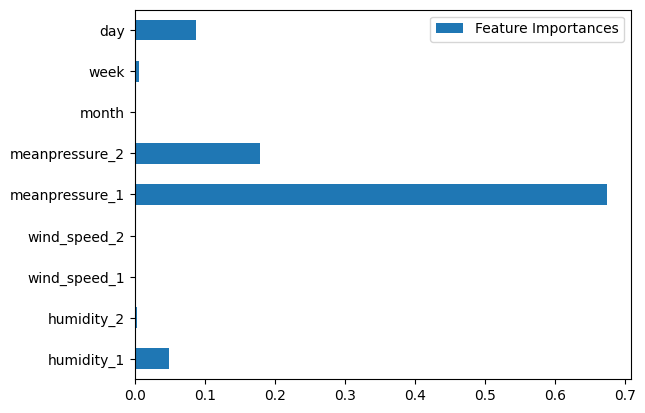

In [46]:
df_imp = pd.DataFrame(gb_model.feature_importances_.reshape(1,-1), columns=X_train.columns, index=["Feature Importances"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

Como se puede apreciar, la presión media del día anterior es la que más contribuye a la predicción, seguida por la presión dos días atrás, el día y la humedad del día anterior. La velocidad del viento, por otro lado, no parece tener efecto alguno en la predicción.

Se recomienda variar los parámetros del algoritmo para comprobar que esto es así independientemente del modelo.

### **Inspección Gráfica de los Resultados de *Forecasting***

A continuación representamos gráficamente las series temporales, tanto en el subconjunto de entrenamiento como en el de evaluación, confrontando el valor real de la temperatura con el valor de la predicción.

<Axes: xlabel='date'>

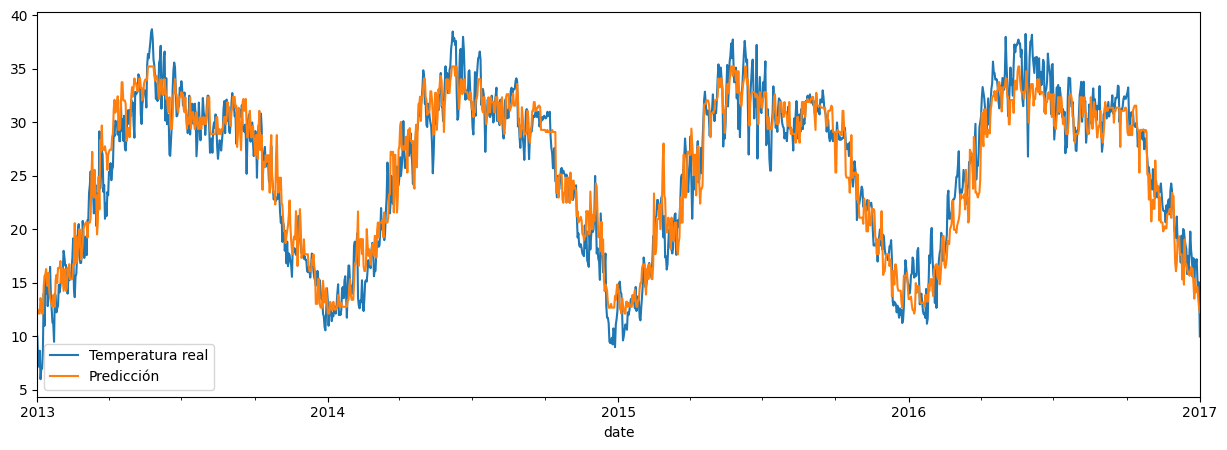

In [47]:
df_train_pred = pd.DataFrame({"Temperatura real":y_train.values, "Predicción":pred_train_gb, "date":df_train["date"].values})
df_train_pred.set_index("date").plot(figsize=(15,5))

Realizamos zoon para ver la correlación gráfica entre ambas:

<Axes: xlabel='date'>

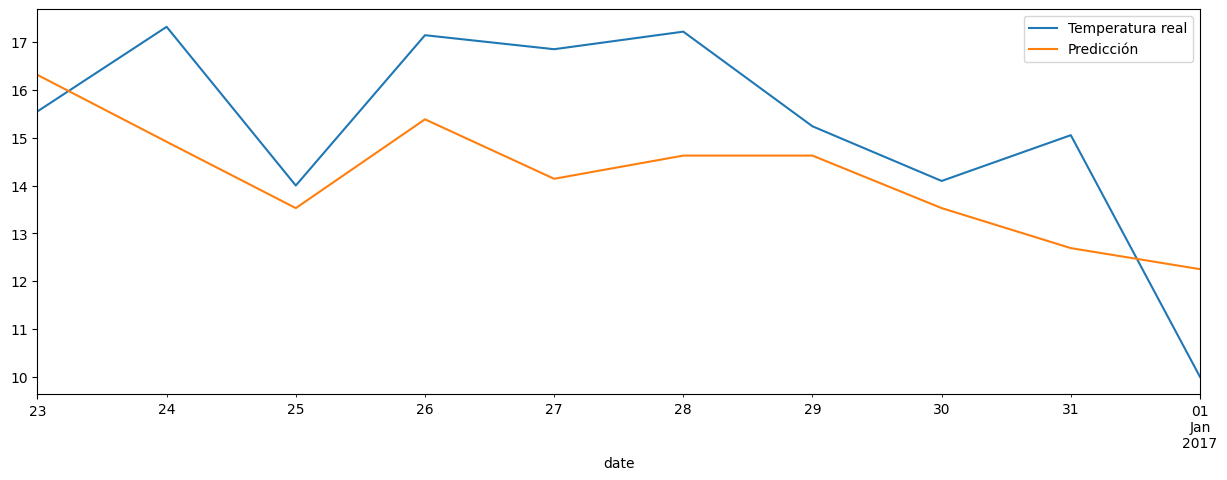

In [48]:
df_train_pred.set_index("date").iloc[-10:,:].plot(figsize=(15,5))

Hacemos lo mismo en el conjunto de evaluación, donde podemos apreciar cierta correlación gráfica entre ambas variables, dando así indicios de la validez del modelo:

<Axes: xlabel='date'>

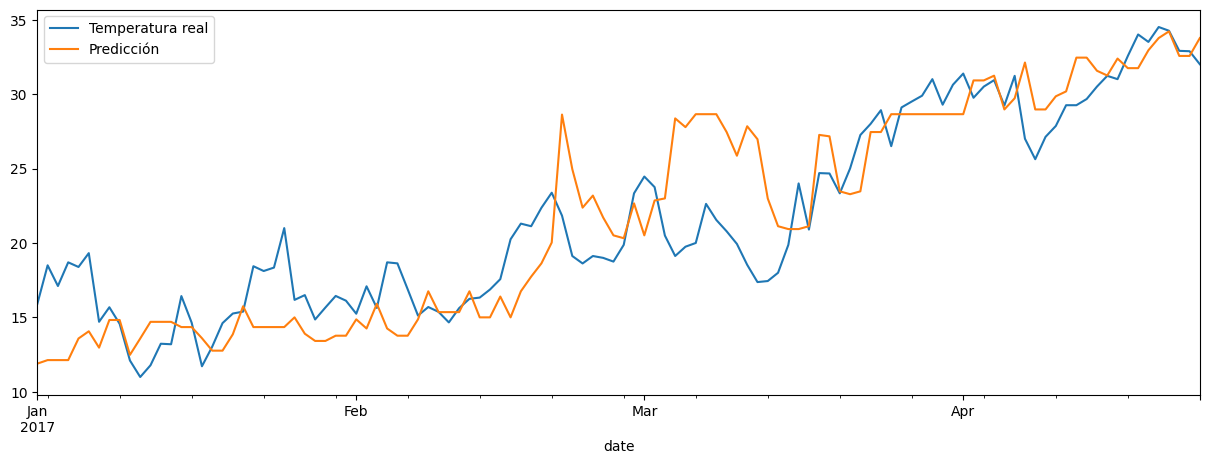

In [49]:
df_test_pred = pd.DataFrame({"Temperatura real":y_test.values, "Predicción":pred_test_gb, "date":df_test["date"].values})
df_test_pred.set_index("date").plot(figsize=(15,5))

### **Evaluación del Modelo**

A diferencia de los modelos de clasificación, la regresión se puede evaluar mediante diferentes métricas. Como resumen, aquí se muestra la evaluación del anterior modelo en base a cuatro de ellas: *MSA*, *MSE*, *RMSE*, y $r^2$:

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, pred_test_gb)
mse = mean_squared_error(y_test, pred_test_gb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_test_gb)

# Imprimir las métricas de evaluación
print("Mean Absolute Error (MAE): {:.3f}".format(mae))
print("Mean Squared Error (MSE): {:.3f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.3f}".format(rmse))
print("R-squared (R2): {:.3f}".format(r2))

Mean Absolute Error (MAE): 2.633
Mean Squared Error (MSE): 12.172
Root Mean Squared Error (RMSE): 3.489
R-squared (R2): 0.696


# **IDEAS CLAVE**
<br>
<hr>
<p> <h1> <center> <strong> Gradient Boosting </center> </strong> </h1> </p>
<hr>
<br>



* *Gradient Boosting* es una técnica de **ensamblado** de modelos que combina varios ***weak learners*** para construir un modelo más fuerte y preciso.

* El algoritmo *Gradient Boosting* es **iterativo** y se basa en la **minimización de errores**. En cada iteración, se construye un nuevo modelo que se enfoca en los errores residuales del modelo anterior, de manera que los errores se minimicen en cada iteración sucesiva.

* *Gradient Boosting* utiliza típicamente **árboles de decisión** como *weak learners*, aunque también puede utilizarse con otros tipos de modelos.

* La **parada temprana** es una técnica comúnmente utilizada en *Gradient Boosting* para evitar el sobreajuste. Consiste en detener el proceso de entrenamiento del modelo antes de completar todas las iteraciones si se observa que el rendimiento en el conjunto de validación deja de mejorar.

* La **tasa de aprendizaje** o *learning rate* en *Gradient Boosting* es un hiperparámetro que controla la magnitud del ajuste realizado en cada iteración del algoritmo. Una tasa de aprendizaje más alta puede hacer que el modelo converja más rápidamente, pero también puede aumentar el riesgo de sobreajuste, mientras que una tasa de aprendizaje más baja puede hacer que el modelo converja más lentamente.

* *Gradient Boosting* también puede incluir técnicas de **regularización**, como la restricción de la **profundidad de los árboles**, la reducción del **número de estimadores** o el uso de **funciones de pérdida** específicas para mitigar el sobreajuste y mejorar la generalización del modelo.

* *Gradient Boosting* tiene varios **hiperparámetros** que deben ser ajustados adecuadamente, como la profundidad de los árboles, el número de estimadores, la tasa de aprendizaje y las técnicas de regularización, lo que requiere una cuidadosa selección y afinamiento para obtener el mejor rendimiento del modelo.

* A diferencia de algunos otros algoritmos de aprendizaje automático, como la regresión lineal o la regresión logística, los modelos de *Gradient Boosting* **no son inherentemente interpretables** debido a su naturaleza basada en árboles. Sin embargo, se pueden aplicar técnicas de interpretación específicas, como la **importancia de características** o el análisis de errores, para obtener información sobre la importancia de las características y el comportamiento del modelo.

* *Gradient Boosting* es conocido por su alto rendimiento en muchos problemas de aprendizaje supervisado, especialmente en problemas de **clasificación** y **regresión**, y ha sido ampliamente utilizado en la comunidad de ciencia de datos y aprendizaje automático.

* Las bibliotecas populares para la construcción de *Gradient Boosting* incluyen ***Scikit-Learn*** en su módulo *ensembles* (***GradientBoostingClassifier*** y ***GradientBoostingRegressor***), así como las librerías especializadas ***XGBoost***, ***LightGBM***, o ***CatBoost*** en ***Python***, o ***GBM*** en ***R***.